# Analyse von Log-Einträgen pro Kurs nach Studiengängen

Die Mengen an Log-Einträgen pro Kurs werden im Kontext der Studiengänge betrachtet.

**Ergebnis**
Die Mengen an Log-Einträgen pro Kurs waren in den jeweiligen Studiengängen sehr unterschiedlich.
In vielen Kursen wurden kaum nennenswerte Mengen an Aktivitäten verzeichnet.

### Import von Bibliotheken und anderen Erweiterungen

In [193]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [194]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [195]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [196]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [197]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [198]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Ausgabe der Mengen an Log-Einträgen pro courseid für alle Studiengänge

In [199]:
loggings_per_course = moodle_data.courseid.groupby(moodle_data.courseid).count()
display(loggings_per_course)

courseid
0        432801
1          1411
139          12
331           2
401           6
          ...  
28514      6252
28515      3911
28560       450
28564        11
28578        30
Name: courseid, Length: 579, dtype: int64

In [200]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_course.describe())

count       579.000000
mean       1554.647668
std       18150.783634
min           1.000000
25%           6.000000
50%          27.000000
75%         222.500000
max      432801.000000
Name: courseid, dtype: float64

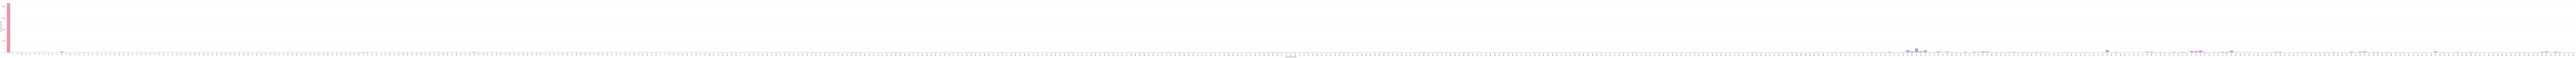

In [201]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro courseid für alle Studiengänge
result = loggings_per_course
# Visualisierung der Mengen an Log-Einträgen pro courseid für alle Studiengänge
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro courseid für den Studiengang 0

In [202]:
loggings_per_course = moodle_data.courseid[moodle_data.Studiengang.astype(int) == 0].groupby(moodle_data.courseid).count()
display(loggings_per_course)

courseid
0        432801
1          1411
139          12
331           2
401           6
          ...  
28302       561
28383         4
28472         6
28564        11
28578        30
Name: courseid, Length: 294, dtype: int64

In [203]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_course.describe())

count       294.000000
mean       1599.326531
std       25237.584392
min           1.000000
25%           5.000000
50%          13.000000
75%          60.000000
max      432801.000000
Name: courseid, dtype: float64

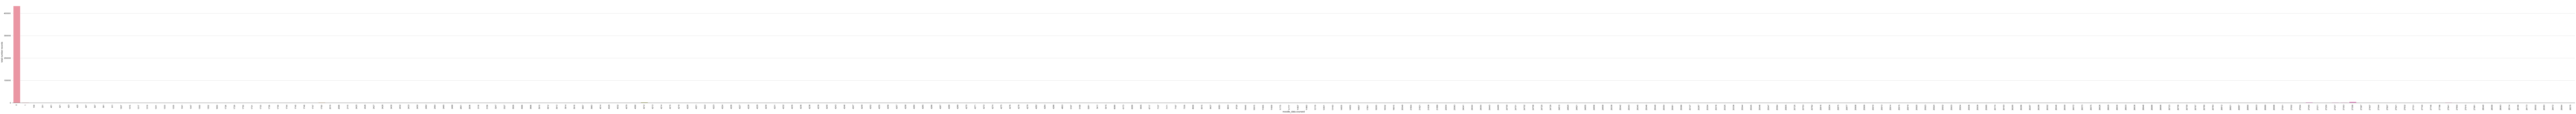

In [204]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro courseid für den Studiengang 0
result = loggings_per_course
# Visualisierung der Mengen an Log-Einträgen pro courseid für den Studiengang 0
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro courseid für den Studiengang 1

In [205]:
loggings_per_course = moodle_data.courseid[moodle_data.Studiengang.astype(int) == 1].groupby(moodle_data.courseid).count()
display(loggings_per_course)

courseid
627       671
629      7555
1906        3
2399       27
2774        6
         ... 
28238    2536
28239    1157
28241    3295
28242     173
28482    5227
Name: courseid, Length: 103, dtype: int64

In [206]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_course.describe())

count      103.000000
mean      1692.495146
std       4687.015409
min          1.000000
25%          7.500000
50%         34.000000
75%        657.500000
max      34710.000000
Name: courseid, dtype: float64

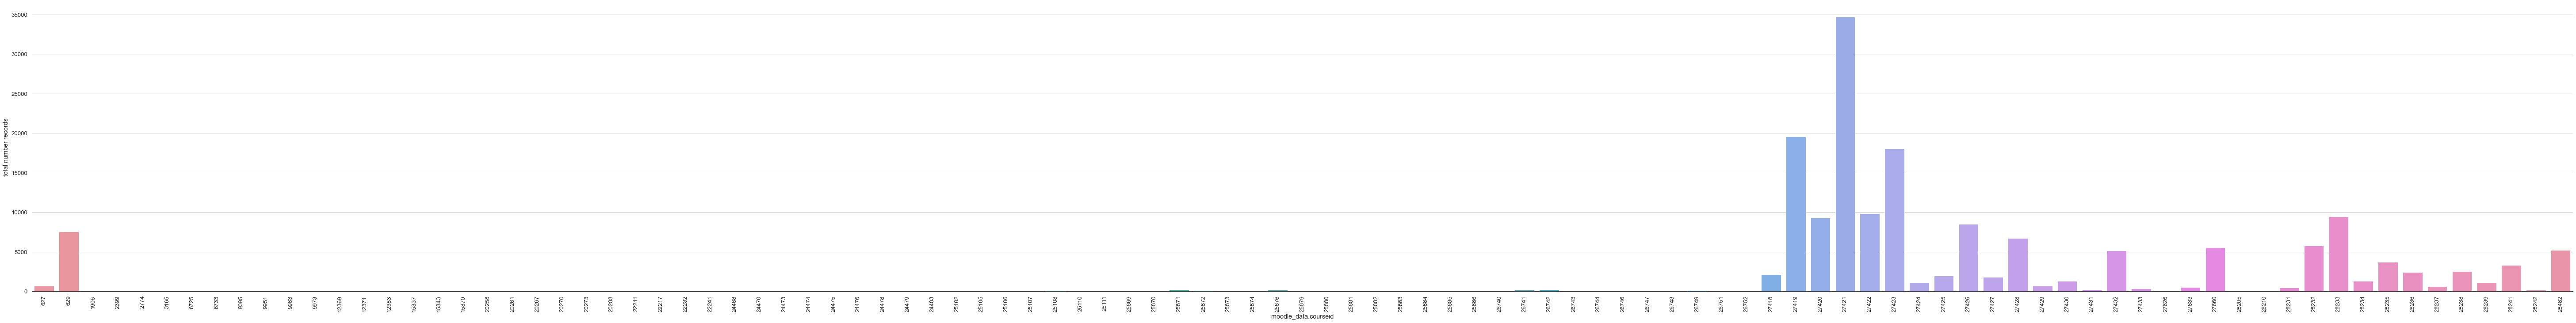

In [207]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro courseid für den Studiengang 1
result = loggings_per_course
# Visualisierung der Mengen an Log-Einträgen pro courseid für den Studiengang 1
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro courseid für den Studiengang 2

In [208]:
loggings_per_course = moodle_data.courseid[moodle_data.Studiengang.astype(int) == 2].groupby(moodle_data.courseid).count()
display(loggings_per_course)

courseid
4217      428
4245     3690
4273       36
10937       2
12351       2
         ... 
28263     451
28264     544
28265     161
28266      18
28267     377
Name: courseid, Length: 112, dtype: int64

In [209]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_course.describe())

count     112.000000
mean      652.116071
std      1506.303469
min         1.000000
25%         6.000000
50%        59.500000
75%       436.000000
max      8549.000000
Name: courseid, dtype: float64

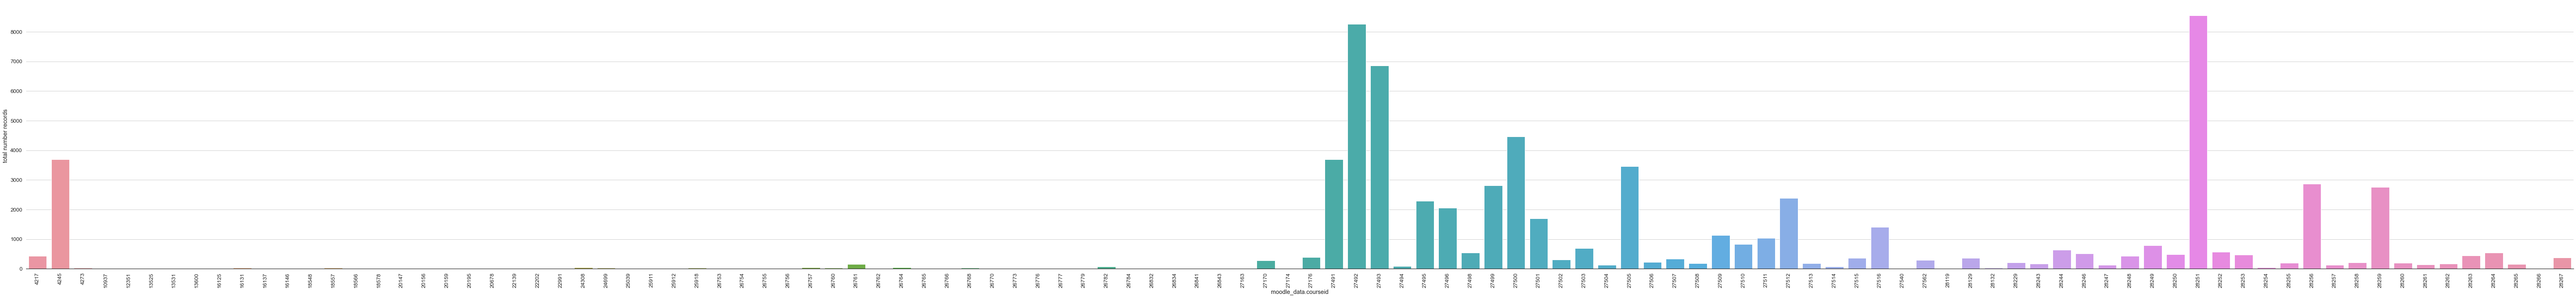

In [210]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro courseid für den Studiengang 2
result = loggings_per_course
# Visualisierung der Mengen an Log-Einträgen pro courseid für den Studiengang 2
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro courseid für den Studiengang 3

In [211]:
loggings_per_course = moodle_data.courseid[moodle_data.Studiengang.astype(int) == 3].groupby(moodle_data.courseid).count()
display(loggings_per_course)

courseid
24046     1785
24047       29
24048      176
24049      180
24050      338
24051       64
25568     1314
26888      133
26889       31
27781     3487
27810    11630
27811    10766
27812    16899
27813     4633
27814     1295
27815     2472
27816     1823
27817     5888
27818     4888
27819    14639
27848      791
28512     9469
28513      175
28514     6252
28515     3911
28560      450
Name: courseid, dtype: int64

In [212]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_course.describe())

count       26.000000
mean      3981.461538
std       4867.038305
min         29.000000
25%        219.500000
50%       1804.000000
75%       5638.000000
max      16899.000000
Name: courseid, dtype: float64

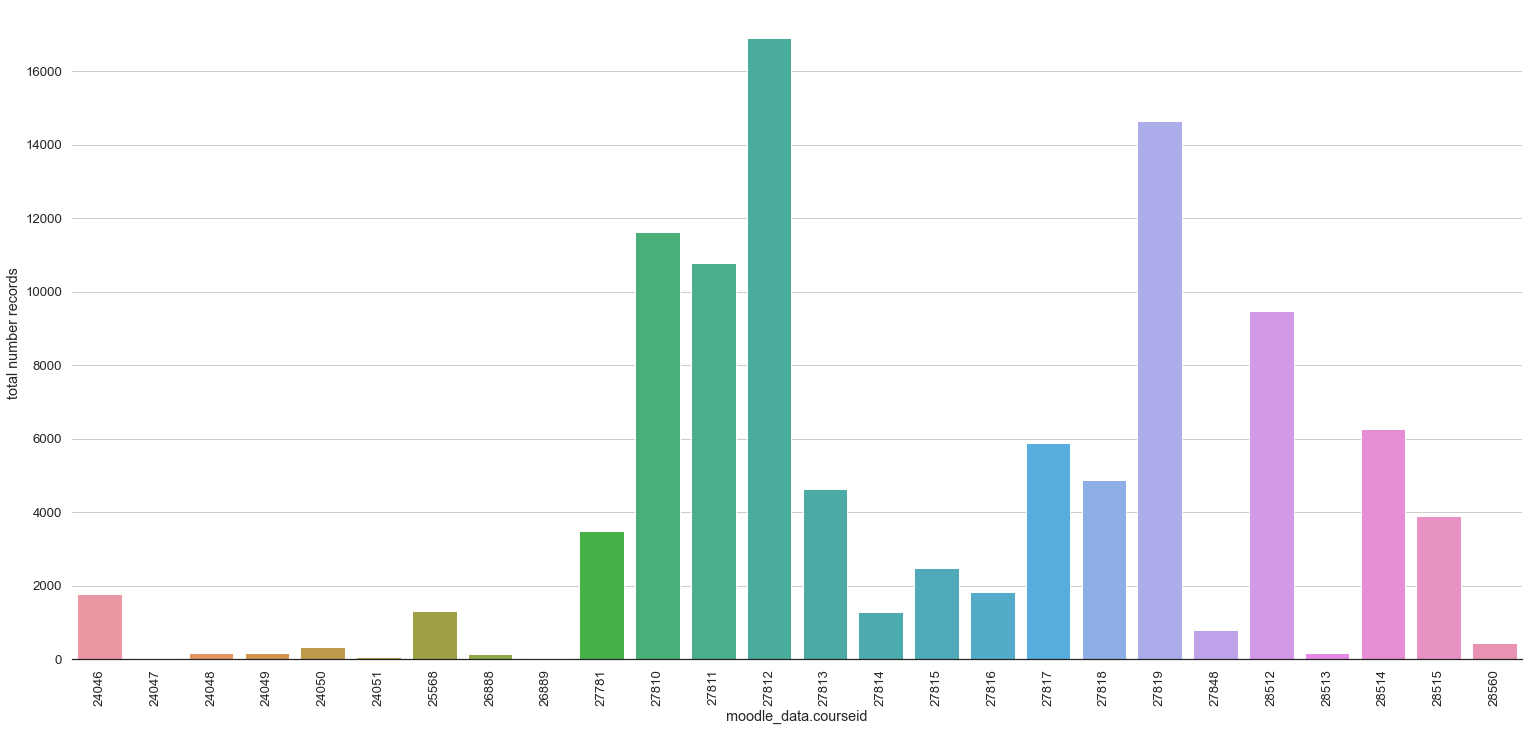

In [213]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro courseid für den Studiengang 3
result = loggings_per_course
# Visualisierung der Mengen an Log-Einträgen pro courseid für den Studiengang 3
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an Log-Einträgen pro courseid für den Studiengang 4

In [214]:
loggings_per_course = moodle_data.courseid[moodle_data.Studiengang.astype(int) == 4].groupby(moodle_data.courseid).count()
display(loggings_per_course)

courseid
3985        10
4209        80
4237       956
4759       220
24221        6
25673      102
25751       10
25752        2
25907        2
26435        5
26517      803
26521      852
26656        2
26681        9
26682       23
26685       10
26687        5
26719       91
27129      549
27231     3386
27439     5037
27518       85
27582    18918
27583     1097
27584     4234
27587      193
27637     6774
27739     2960
27747     3701
27780       10
28103      459
28109     5004
28110     5167
28217      302
28218     2762
28221     1489
28222     3491
28223     1735
28228       82
28230     6725
28337      755
28344       57
28345      624
28481      273
Name: courseid, dtype: int64

In [215]:
# Ausgabe statistischer Werte für das ermittelte Ergebnis
display(loggings_per_course.describe())

count       44.000000
mean      1796.750000
std       3292.751632
min          2.000000
25%         19.750000
50%        380.500000
75%       2811.500000
max      18918.000000
Name: courseid, dtype: float64

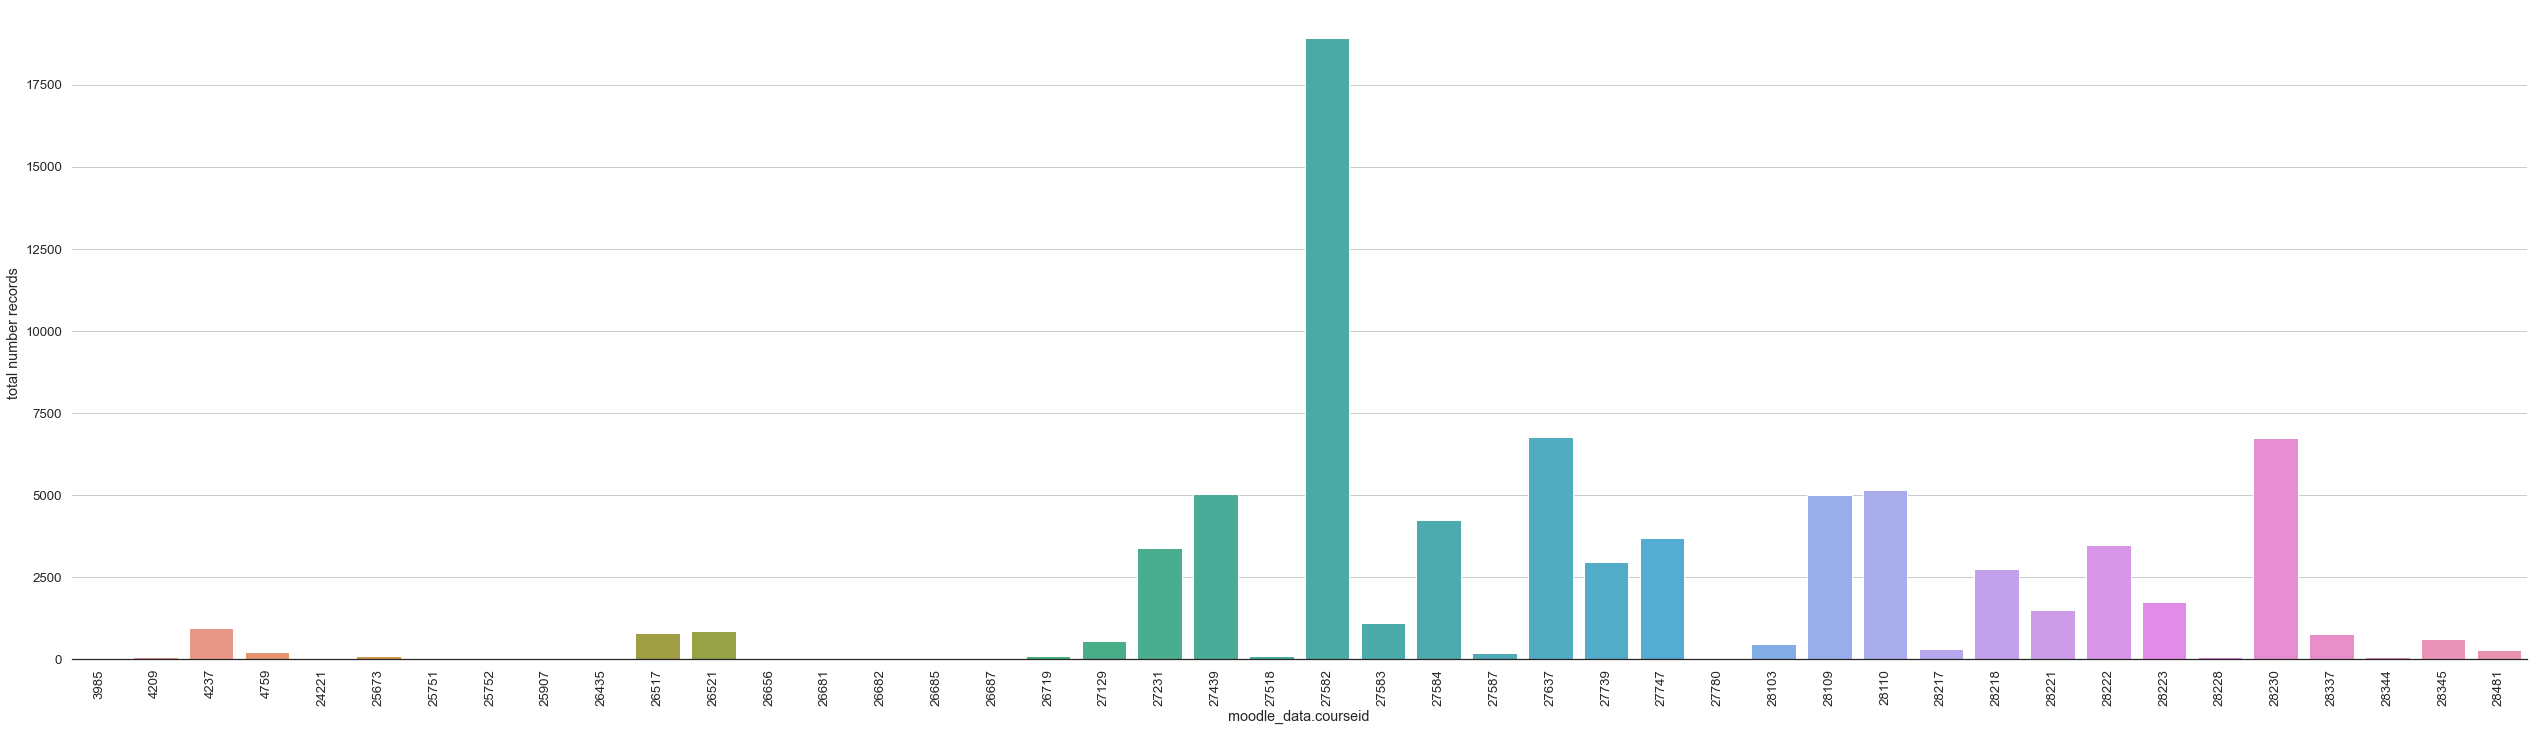

In [216]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(loggings_per_course.count(), 12)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an Log-Einträgen pro courseid für den Studiengang 4
result = loggings_per_course
# Visualisierung der Mengen an Log-Einträgen pro courseid für den Studiengang 4
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()